# Polynomial Regression part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:/Users/korla/Desktop/Kaggle data sets/polynomial linear regression/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.iloc[:,1:2]
y = df.iloc[:,-1]


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

,Level
7,8
2,3
9,10
4,5
3,4
6,7


In [10]:
X_test

,Level
8,9
1,2
5,6
0,1


In [11]:
y_train

7     300000
2      60000
9    1000000
4     110000
3      80000
6     200000
Name: Salary, dtype: int64

In [12]:
y_test

8    500000
1     50000
5    150000
0     45000
Name: Salary, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [14]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
X_train_pred = reg.predict(X_train)
X_train_pred

array([505263.15789474, -77272.72727273, 738277.51196172, 155741.62679426,
        39234.44976077, 388755.98086124])

In [17]:
a=pd.DataFrame({"actual":y_train,"predict":X_train_pred})
a

,actual,predict
7,300000,505263.157895
2,60000,-77272.727273
9,1000000,738277.511962
4,110000,155741.626794
3,80000,39234.449761
6,200000,388755.980861


In [18]:
y_test_pred=reg.predict(X_test)
y_test_pred

array([ 621770.33492823, -193779.90430622,  272248.80382775,
       -310287.08133971])

In [19]:
a1=pd.DataFrame({"actual":y_test,"predict":y_test_pred})
a1

,actual,predict
8,500000,621770.334928
1,50000,-193779.904306
5,150000,272248.803828
0,45000,-310287.081340


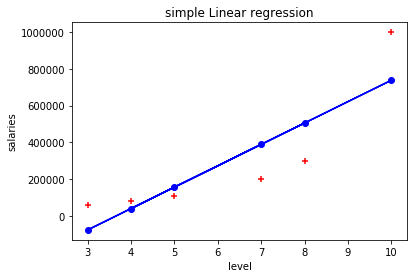

In [20]:
plt.title("simple Linear regression")
plt.xlabel("level")
plt.ylabel("salaries")
plt.scatter(X_train,y_train,color="red",marker="+")
plt.plot(X_train,X_train_pred,color="blue",marker="o")
plt.show()

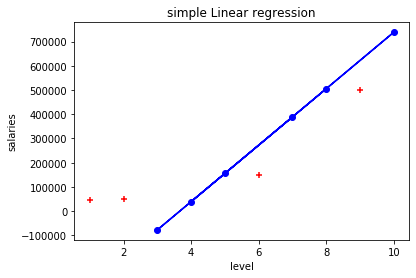

In [21]:
plt.title("simple Linear regression")
plt.xlabel("level")
plt.ylabel("salaries")
plt.scatter(X_test,y_test,color="red",marker="+")
plt.plot(X_train,X_train_pred,color="blue",marker="o")
plt.show()

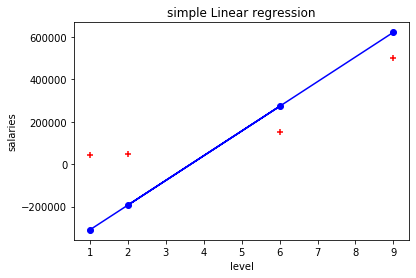

In [23]:
plt.title("simple Linear regression")
plt.xlabel("level")
plt.ylabel("salaries")
plt.scatter(X_test,y_test,color="red",marker="+")
plt.plot(X_test,y_test_pred,color="blue",marker="o")
plt.show()

In [25]:
# w.r.t training data
from sklearn.metrics import r2_score
r2_score(y_train,X_train_pred) * 100

73.68509287461497

In [27]:
# w.r.t test data
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred) * 100

-55.80551383902055

# Using Polynomial Regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures
X_rate = PolynomialFeatures(degree = 5)
X_poly = X_rate.fit_transform(X_train)
X_poly

array([[1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04]])

In [67]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
X_train_pred_poly = reg1.predict(X_rate.fit_transform(X_train))
X_train_pred_poly

array([300000.00000052,  60000.00000074, 999999.99999772, 110000.00000039,
        80000.00000032, 200000.00000032])

In [69]:
a2 = pd.DataFrame({"actual":y_train,"poly predict":X_train_pred_poly})
a2

,actual,poly predict
7,300000,300000.000001
2,60000,60000.000001
9,1000000,999999.999998
4,110000,110000.000000
3,80000,80000.000000
6,200000,200000.000000


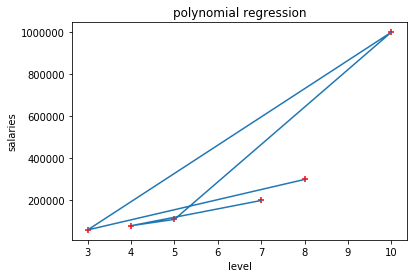

In [70]:
plt.title("polynomial regression")
plt.xlabel("level")
plt.ylabel("salaries")
plt.scatter(X_train,y_train,color="red",marker="+")
plt.plot(X_train,X_train_pred_poly)
plt.show()

In [71]:
from sklearn.metrics import r2_score
r2_score(y_train,X_train_pred_poly)*100

100.0

In [72]:
y_test_pred_poly = reg1.predict(X_rate.fit_transform(X_test))
y_test_pred_poly

array([522380.9523813 ,  45714.28571803, 147619.04761938,  10000.00001372])

In [73]:
a3 = pd.DataFrame({"actual":y_test,"poly predict":y_test_pred_poly})
a3

,actual,poly predict
8,500000,522380.952381
1,50000,45714.285718
5,150000,147619.047619
0,45000,10000.000014


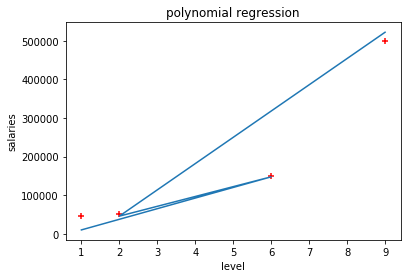

In [74]:
plt.title("polynomial regression")
plt.xlabel("level")
plt.ylabel("salaries")
plt.scatter(X_test,y_test,color="red",marker="+")
plt.plot(X_test,y_test_pred_poly)
plt.show()

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred_poly)*100

98.73438986779081